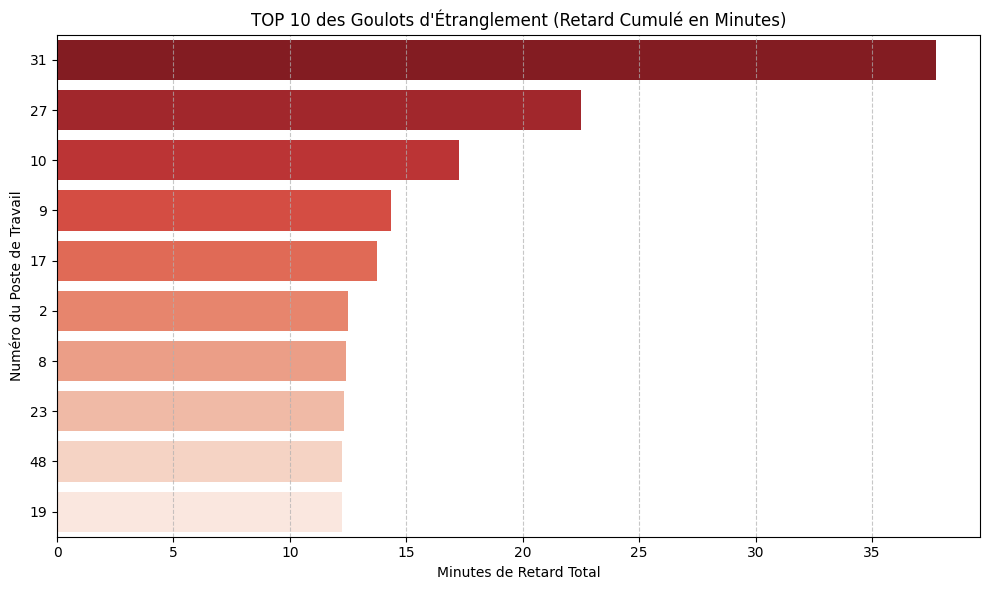

Le pire poste est le n°31.
Causes identifiées : ['Obsolescence générale, sous-investissement']


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import numpy as np

# 1. Chargement des données
df = pd.read_excel('MES_Extraction.xlsx')

# 2. Conversion robuste des temps vers minutes
def to_minutes(series):
    td = pd.to_timedelta(series.astype(str), errors='coerce')
    return td.dt.total_seconds() / 60

df['Minutes_Prevues'] = to_minutes(df['Temps Prévu'])
df['Minutes_Reelles'] = to_minutes(df['Temps Réel'])

# 3. Calcul du Retard
df['Retard_Minutes'] = df['Minutes_Reelles'] - df['Minutes_Prevues']

# 4. Top 10 postes
top_retards = (
    df.groupby('Poste', dropna=True)['Retard_Minutes']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# 5. Visualisation (seulement s’il y a des valeurs non nulles)
if top_retards.dropna().abs().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_retards.values,
        y=top_retards.index.astype(str),
        hue=top_retards.index.astype(str),
        palette='Reds_r',
        dodge=False,
        legend=False
    )
    plt.title("TOP 10 des Goulots d'Étranglement (Retard Cumulé en Minutes)")
    plt.xlabel('Minutes de Retard Total')
    plt.ylabel('Numéro du Poste de Travail')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    pire_poste = top_retards.index[0]
    causes = df[df['Poste'] == pire_poste]['Cause Potentielle'].dropna().unique()
    print(f"Le pire poste est le n°{pire_poste}.")
    print(f"Causes identifiées : {causes}")
else:
    print("Aucun retard calculé (les temps n'ont probablement pas été parsés). Vérifiez le format des colonnes 'Temps Prévu' et 'Temps Réel'.")